In [50]:
%matplotlib inline

import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Input,Dropout
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras import backend as K

In [3]:
from PIL import Image

def drawWeights(img):
    img = img[1:]
    mn = min(img)
    img = [a-mn for a in img]
    print(img)
    mx = max(img)
    img = [round((a/mx)*255) for a in img]
    i = numpy.asarray(img)
    i = i.reshape(28,28)
    im = Image.fromarray(i)
    im.show()

In [4]:
BATCH_SIZE = 2
NUM_CLASSES = 50
TRAIN_SAMPLES = 8
VAL_SAMPLES = 2

STARTING_CLASS = 150

In [5]:
model = vgg16.VGG16( weights='imagenet', include_top=False ) #downloads prebuilt

In [6]:
for layer in model.layers:
    layer.trainable = False

In [7]:
model.compile( loss="categorical_crossentropy", optimizer="adagrad", metrics=["accuracy"] )

In [8]:
datagen = ImageDataGenerator(rescale=1./255)

In [9]:
generator = datagen.flow_from_directory(
            'data/train',
            target_size=(224, 224),
            batch_size=BATCH_SIZE,
            class_mode=None,
            shuffle=False)

Found 4096 images belonging to 256 classes.


In [10]:
len([generator.next() for _ in range(STARTING_CLASS*TRAIN_SAMPLES)]) #skip up to the starting class

1200

In [11]:
bottleneck_features_train = model.predict_generator(generator, TRAIN_SAMPLES*NUM_CLASSES)

In [12]:
generator2 = datagen.flow_from_directory(
            'data/train',
            target_size=(224, 224),
            batch_size=1,
            class_mode=None,
            shuffle=False)

Found 4096 images belonging to 256 classes.


In [13]:
get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

get_last_layer_output = K.function([model.layers[0].input],
                                  [model.layers[-2].output])

test_image = generator2.next()
layer_1st_output = get_1st_layer_output([test_image])[0]
layer_last_output = get_last_layer_output([test_image])[0]
#layer_1st_output = model.layers[0].W.get_value()

In [14]:
print(layer_1st_output.shape)

(1, 224, 224, 64)


In [15]:
print(layer_last_output.shape)

(1, 14, 14, 512)


In [16]:
print(test_image.shape)

(1, 224, 224, 3)


(1, 224, 224, 64)


<module 'matplotlib.pyplot' from 'c:\\users\\derek\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

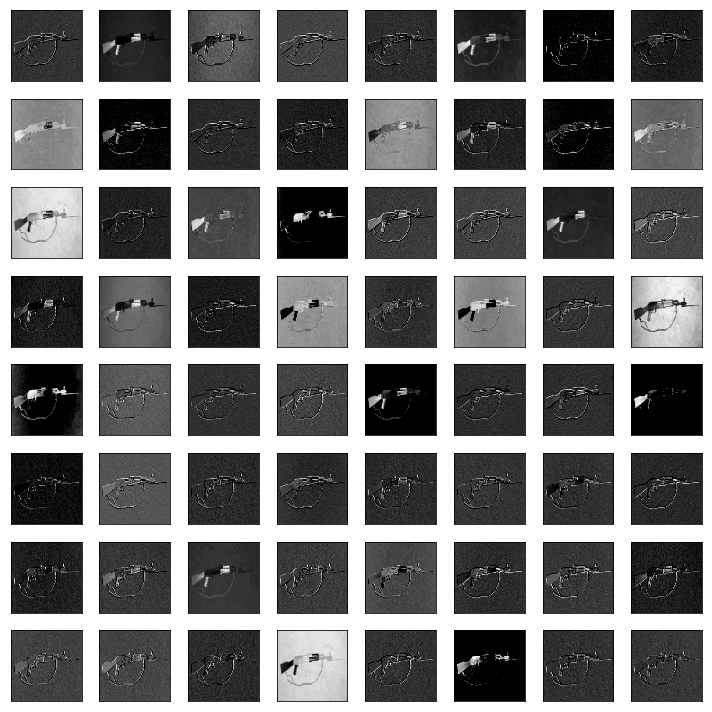

In [17]:
#Rearrange dimension so we can plot the result as RGB images
#output_image = np.rollaxis(np.rollaxis(layer_1st_output, 3, 1), 3, 1)
output_image = layer_1st_output
print(output_image.shape)
fig=plt.figure(figsize=(10,10))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(output_image[0,:,:,i],cmap=matplotlib.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt

In [19]:
fig.savefig('ak47_0001_layer1.png')

In [ ]:
#Rearrange dimension so we can plot the result as RGB images
#output_image = np.rollaxis(np.rollaxis(layer_1st_output, 3, 1), 3, 1)
output_image2 = layer_last_output
print(output_image2.shape)
fig2=plt.figure(figsize=(15,30))
for i in range(512):
    ax = fig2.add_subplot(32, 16, i+1)
    temp = scipy.ndimage.zoom(output_image2[0,:,:,i], 2, order=0)
    ax.imshow(temp,cmap=matplotlib.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt

(1, 14, 14, 512)


In [64]:
fig2.savefig('ak47_0001_lastLayer.png')